##### Data description

user_data:
* client – идентификатор пользователя
* premium – является ли клиент премиальным
* age – возраст

logs:
* client – идентификатор пользователя
* success – результат (успех – 1, нет – 0)
* platform – платформа
* time – время в формате Unix

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1.
# Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, 
# описательную статистику.

In [5]:
user_data = pd.read_csv(r'C:\Users\Dubreee\Python\KarpovCourses_Demo\Lesson_3\mini_project\user_data.csv')
logs = pd.read_csv(r'C:\Users\Dubreee\Python\KarpovCourses_Demo\Lesson_3\mini_project\logs.csv')

In [6]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [7]:
user_data.shape

(2954, 3)

In [8]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [9]:
# Пропущенных значений в user_data нет
user_data.isnull().sum()

client     0
premium    0
age        0
dtype: int64

In [10]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [11]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [12]:
logs.shape

(4500, 4)

In [13]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [38]:
# Пропущенных значений в logs нет
logs.isnull().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [15]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [16]:
# Сколько уникальных значений принимает переменная platform?

In [17]:
logs.platform.unique()

array(['phone', 'computer', 'tablet'], dtype=object)

In [ ]:
# Какой клиент совершил больше всего успешных операций?
# Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) 
# через запятую и пробел в порядке возрастания.

In [32]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [40]:
logs\
    .query('success == True') \
    .groupby('client', as_index=False) \
    .agg({'success':'count'}) \
    .sort_values('success', ascending=False) \
    .query('success == success.max()') \
    .sort_values('client') \
    .client.to_list()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [30]:
# С какой платформы было совершено наибольшее количество успешных операций?

In [39]:
logs \
    .groupby('platform', as_index=False) \
    .agg({'success':'sum'}) \
    .sort_values('success', ascending=False)

,platform,success
1,phone,2019.0
0,computer,1090.0
2,tablet,180.0


In [43]:
logs \
    .query("success == True") \
    .platform.value_counts() \
    .idxmax()

'phone'

In [ ]:
# Какую платформу предпочитают премиальные клиенты?

In [49]:
user_data \
        .merge(logs, on='client') \
        .query('premium == True') \
        .platform \
        .value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [48]:
user_data \
        .merge(logs, on='client') \
        .query('premium == True') \
        .platform \
        .value_counts() \
        .idxmax()

'phone'

In [50]:
# Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), 
# используя библиотеку seaborn с исходными параметрами.

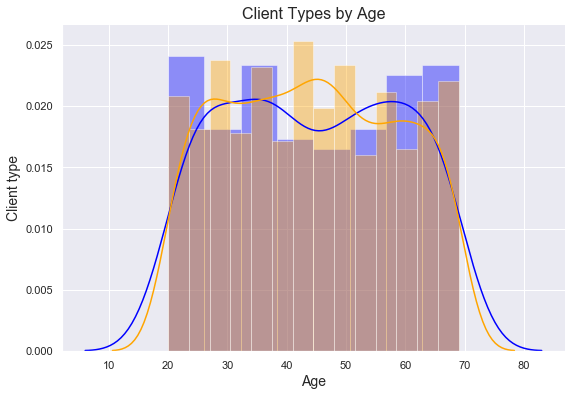

In [73]:
# sns.set(rc={'figure.figsize':(9, 6)})

ax_1 = sns.distplot(user_data[user_data['premium']==True].age, color='blue')
ax_2 = sns.distplot(user_data[user_data['premium']==False].age, color='orange')

plt.title('Client Types by Age', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Client type', fontsize=14)
sns.despine()

In [89]:
# Постройте график распределения числа успешных операций: 
# x – число успешных операций
# y – число клиентов, совершивших такое количество успешных операций

In [63]:
data = logs.merge(user_data, on='client')

In [64]:
data.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [97]:
# Число успешных операций для каждого клиента:
successful_operations = data \
                            .groupby('client') \
                            .agg({'success':'sum'})
successful_operations

,success
client,
40,1.0
75,1.0
81,1.0
132,1.0
164,1.0
...,...
99926,1.0
99927,1.0
99931,1.0


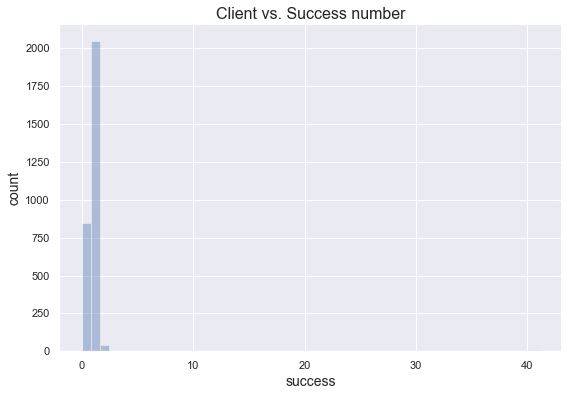

In [92]:
ax = sns.distplot(successful_operations, kde=False)

plt.title('Client vs. Success number', fontsize=16)
plt.xlabel('success', fontsize=14)
plt.ylabel('count', fontsize=14)
sns.despine()

In [114]:
successful_operations.success.value_counts()

1.0     2051
0.0      850
2.0       42
41.0       9
3.0        1
40.0       1
Name: success, dtype: int64

In [ ]:
# ИЛИ

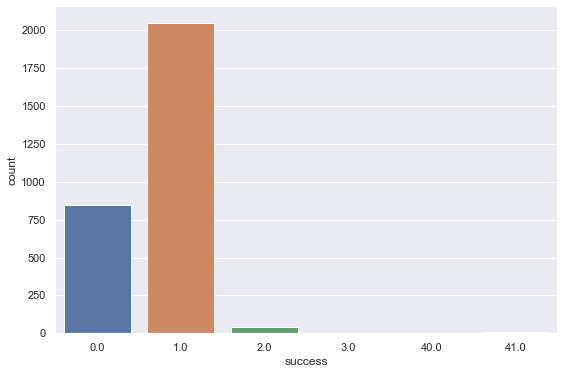

In [93]:
sns.countplot(x='success',
              data=successful_operations)
sns.despine()

In [ ]:
# Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. 
# По оси x – возраст, по оси y – число успешных операций. 
# Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки. 

In [98]:
data.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [99]:
success_computer = data.query("success == True & platform == 'computer'")

In [100]:
success_computer

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25
...,...,...,...,...,...,...
3409,4293,True,computer,1585403129,False,29
3425,16540,True,computer,1585456144,False,49
3432,85769,True,computer,1585447052,False,46
3433,81031,True,computer,1585401631,False,45


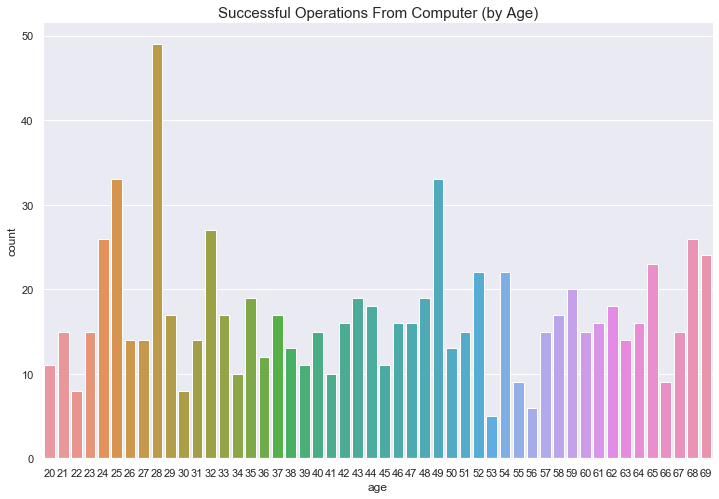

In [107]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='age',
                   data=success_computer)
plt.title('Successful Operations From Computer (by Age)', fontsize=15)
sns.despine()

In [112]:
#  Клиенты какого возраста совершили наибольшее количество успешных действий с компьютера?
success_computer.groupby('age').agg({'success':'count'}).sort_values('success', ascending=False).head()

,success
age,
28,49
49,33
25,33
32,27
68,26


In [114]:
success_computer.groupby('age').agg({'success':'count'}).idxmax()

success    28
dtype: int64

In [117]:
# Количество успешных операций с телефона

In [118]:
success_phone = data.query("success == True & platform == 'phone'")
success_phone

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
4,61468,True,phone,1585441266,False,25
5,61468,True,phone,1585439167,False,25
6,61468,True,phone,1585409248,False,25
8,61468,True,phone,1585414972,False,25
...,...,...,...,...,...,...
3426,75290,True,phone,1585452542,False,33
3430,67366,True,phone,1585453296,False,56
3431,72908,True,phone,1585416689,True,66
3437,8967,True,phone,1585465121,False,33


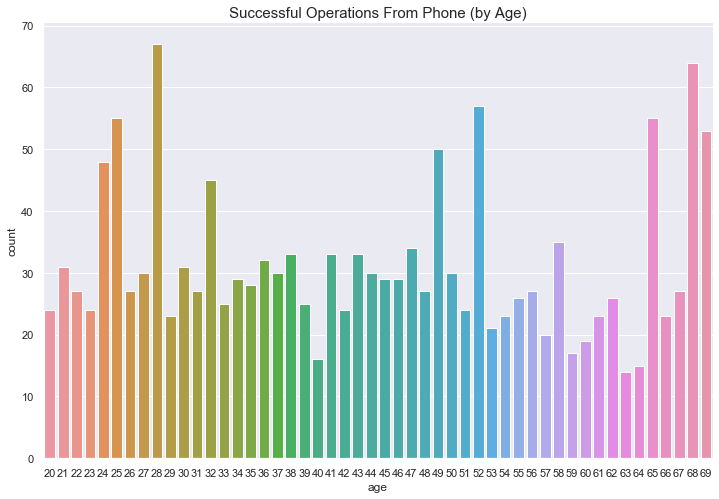

In [120]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='age',
                   data=success_phone)
plt.title('Successful Operations From Phone (by Age)', fontsize=15)
sns.despine()

In [122]:
success_phone.groupby('age').agg({'success':'count'}).idxmax()

success    28
dtype: int64

In [123]:
# И с телефона, и с компьютера наибольшее число операций совершают люди 28 лет.